In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
import keras
from keras import layers

gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.OneHot_gen import *
from Utils.TFIDF_gen import *
from Utils.word2vec_gen import *
from Utils.vector_gen import *

from Models.RNN_paper_prototype import *


2024-03-13 22:38:23.354284: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 22:38:23.354310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 22:38:23.355341: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 22:38:23.360907: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 22:38:24.033228: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-03-13 22:38:24.690302: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-13 22:38:24.726192: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-13 22:38:24.726373: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
original_df = dataframe_init(gpu_token)
vectors = vec_split(original_df)
word2vec_init(original_df, vectors, gpu_token)
tensors = tensor_gen(vectors)

2024-03-13 22:38:30.424873: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-13 22:38:30.425106: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-13 22:38:30.425252: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
model = model_init(vectors[0]['Encoded Lines'][0].shape[0])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 218, 1024)         1050624   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 218, 1024)         2098176   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [4]:
history = model.fit(tensors[0], tensors[2], epochs=20)

Epoch 1/20
131/131 [==============================] - 39s 278ms/step - loss: 0.0115 - accuracy: 0.9808
Epoch 2/20
131/131 [==============================] - 36s 278ms/step - loss: 0.0110 - accuracy: 0.9813
Epoch 3/20
131/131 [==============================] - 36s 278ms/step - loss: 0.0107 - accuracy: 0.9813
Epoch 4/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0106 - accuracy: 0.9813
Epoch 5/20
131/131 [==============================] - 36s 279ms/step - loss: 0.0102 - accuracy: 0.9813
Epoch 6/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0098 - accuracy: 0.9813
Epoch 7/20
131/131 [==============================] - 36s 279ms/step - loss: 0.0111 - accuracy: 0.9813
Epoch 8/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0100 - accuracy: 0.9813
Epoch 9/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0102 - accuracy: 0.9813
Epoch 10/20
131/131 [==============================] - 36s 279ms/step - l

In [5]:
y_pred = model.predict(tensors[1])

33/33 [==============================] - 2s 41ms/step


In [8]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[3]))

In [39]:
def true_false_computation(y_true, y_pred, label):
    true_positives = 0
    false_positives = 0
    true_negetives = 0
    false_negetives = 0
    for i in enumerate(y_pred):
        if i[1] == y_true[i[0]]:
            if i[1] == label:
                true_positives += 1
            else: 
                true_negetives += 1
        elif i[1] != y_true[i[0]]:
            if i[1] == label:
                false_positives += 1
            else: 
                false_negetives += 1
        
    return true_positives, true_negetives, false_positives, false_negetives

def f1(true_positives, false_positives, false_negetives):
    denom = (2*true_positives + false_positives + false_negetives)
    if denom == 0:
        return 0
    else:
        return (2*true_positives/denom)

def precision(true_positives, false_positives):
    denom = true_positives + false_positives
    if denom == 0:
        return 0
    else:
        return  true_positives / denom

def recall(true_positives, false_negetives):
    if false_negetives == 0:
        return 0
    else:
        return true_positives/(true_positives + false_negetives)

def score_summary(label):
    print('For {}:'.format('secure' if label == 0 else 'insecure'))
    true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, label)
    print('f1 score: ', f1(true_positives, false_positives, false_negetives))
    print('precision score: ', precision(true_positives, false_positives))
    print('recall score: ', recall(true_positives, false_negetives))
    print()

score_summary(0)
score_summary(1)


For secure:
f1 score:  0.9903100775193798
precision score:  0.980806142034549
recall score:  0

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0



In [22]:
print(list(classified_outputs))

TypeError: <lambda>() missing 1 required positional argument: 'y'

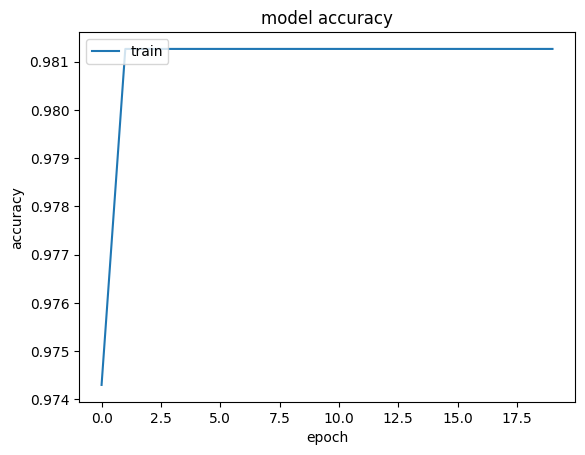

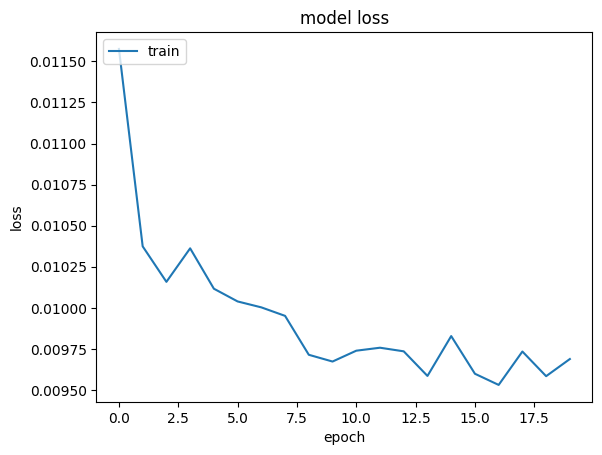

In [6]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in vectors[1].Label:
    if i == [0,1]:
        print(i)

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


In [ ]:
!nvidia-smi

Tue Mar 12 00:07:09 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   37C    P8     5W / 151W |   7888MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------